In [1]:
!pip install -U opencv-python
!pip install "opencv-python-headless<4.3"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=697510d1947e79689bf67b2a3a7639318fcb4672e5aaa15ce0eed4b46ee31027
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Cloning into 'detectron2'...
remote: Enumerating objects: 14778, done.
remote: Cou

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
#import cv2
import random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
#from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from pathlib import Path
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog


In [5]:
# # install dependencies: 
# !pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
# !pip install cython pyyaml==5.1
# !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # install detectron2:
# !pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

In [6]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import gdown
#from google.colab import drive

#drive.mount('/content/gdrive')
#https://drive.google.com/file/d/1_lvjNOUjM_rQYHNpzcuO_QsbTqELWbMs/view?usp=share_link
url='https://universe.roboflow.com/ds/98EZbxK1Wd?key=RhA6xZ6kgB'
output='train.zip'
gdown.download(url, output, quiet=False) #, use_cookies=True)

Downloading...
From: https://universe.roboflow.com/ds/98EZbxK1Wd?key=RhA6xZ6kgB
To: /content/train.zip
100%|██████████| 4.99G/4.99G [03:48<00:00, 21.8MB/s]


'train.zip'

In [8]:
url='https://app.roboflow.com/ds/Nn9kEMIudi?key=hWfMwXBtU6'
output='valid.zip'
gdown.download(url, output, quiet=False) #, use_cookies=True)

Downloading...
From: https://app.roboflow.com/ds/Nn9kEMIudi?key=hWfMwXBtU6
To: /content/valid.zip
100%|██████████| 191M/191M [00:08<00:00, 21.8MB/s]


'valid.zip'

In [9]:
import os
os.chdir('/content/')  #change dir
!unzip -u train.zip -d train/
!unzip -u valid.zip -d valid/

Streaming output truncated to the last 5000 lines.
 extracting: train/train/cfb424a0ac8cf50dc3bb2997366a8d34_jpg.rf.0f3820a652101da39808d4bd0f3d860b.jpg  
 extracting: train/train/cfb424a0ac8cf50dc3bb2997366a8d34_jpg.rf.4f50acc55f1510686e346a50ecbc5048.jpg  
 extracting: train/train/cfb424a0ac8cf50dc3bb2997366a8d34_jpg.rf.763269cbdbc2f598d633d17825b4e041.jpg  
 extracting: train/train/cfbab967533a50ec5ca2a76b061135ce_jpg.rf.526b006112dbdbc88a7d45d3b0d2fc0b.jpg  
 extracting: train/train/cfbab967533a50ec5ca2a76b061135ce_jpg.rf.6784b7e0f161a60d7afcea961822101d.jpg  
 extracting: train/train/cfbab967533a50ec5ca2a76b061135ce_jpg.rf.9448dcaeff76b77420ac0b62dc70504a.jpg  
 extracting: train/train/cfbc000e4454c45fd195428914e8dd0f_jpg.rf.87972faf245cff43c4a5b79b950c15a9.jpg  
 extracting: train/train/cfbc000e4454c45fd195428914e8dd0f_jpg.rf.a3dd587431482db382aefd754353ca73.jpg  
 extracting: train/train/cfbc000e4454c45fd195428914e8dd0f_jpg.rf.c5918ad727d385b1f32fc0c67c08a4dc.jpg  
 extracting: 

In [10]:
!cp /content/train/train/_annotations.coco.json /content/train.json 
!cp /content/valid/valid/_annotations.coco.json /content/valid.json 

In [11]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Sat Jan 21 10:13:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

In [12]:
#!pip install opencv-python==4.5.5.64


In [13]:
# !apt-get update
# !apt-get install ffmpeg libsm6 libxext6  -y #-Europe

In [14]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
#import cv2
import random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
#from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from pathlib import Path
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog


In [15]:
register_coco_instances('smartathon_train2',{}, '/content/train.json', "/content/train/train/")
register_coco_instances('smartathon_val2',{},'/content/valid.json', "/content/valid/valid")

metadata = MetadataCatalog.get('smartathon_train2')
train_ds = DatasetCatalog.get('smartathon_train2')

WARNING [01/21 10:13:38 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/21 10:13:38 d2.data.datasets.coco]: Loaded 21023 images in COCO format from /content/train.json


In [16]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [17]:
#Load phase one trained model (trained earlier)
url='https://docs.google.com/uc?export=download&id=1hOA8fm5KyozXURquL0iFothTFkfHLeGd&confirm=t'
output='phase1_detectron_model1.pth'
gdown.download(url, output, quiet=False) #, use_cookies=True)



Downloading...
From: https://docs.google.com/uc?export=download&id=1hOA8fm5KyozXURquL0iFothTFkfHLeGd&confirm=t
To: /content/phase1_detectron_model1.pth
100%|██████████| 836M/836M [00:16<00:00, 50.3MB/s]


'phase1_detectron_model1.pth'

In [18]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")) #Get the basic model configuration from the model zoo 
#Passing the Train and Validation sets

cfg.DATASETS.TRAIN = ("smartathon_train2",)
cfg.DATASETS.TEST = ("smartathon_val2",)
# Number of data loading threads
cfg.DATALOADER.NUM_WORKERS = 4
#"COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
cfg.MODEL.WEIGHTS = "/content/phase1_detectron_model1.pth"
# Number of images per batch across all machines.

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.CHECKPOINT_PERIOD= 250
cfg.SOLVER.BASE_LR =  0.01250  # pick a good LearningRate
#cfg.SOLVER.STEPS = (3000, 5000, 7000, 10000, 12000, 24000)
#cfg.SOLVER.BASE_LR = 0.0019250  # pick a good LearningRate
cfg.SOLVER.MAX_ITER = 20000  #No. of iterations   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 2048 #256  Using A6000 48GB GPU
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 11 
cfg.TEST.EVAL_PERIOD = 250 # No. of iterations after which the Validation Set is evaluated. 
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)



[01/21 10:14:03 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [19]:
# trainer.resume_or_load(resume=False)
# trainer.train()

In [20]:
#Load phase one trained model (trained earlier)
url='https://docs.google.com/uc?export=download&id=1hv3dt3xottJutYSfVZnqRlBEikz_K12X&confirm=t'
output='phase1_detectron_model2.pth'
gdown.download(url, output, quiet=False) #, use_cookies=True)



Downloading...
From: https://docs.google.com/uc?export=download&id=1hv3dt3xottJutYSfVZnqRlBEikz_K12X&confirm=t
To: /content/phase1_detectron_model2.pth
100%|██████████| 836M/836M [00:15<00:00, 52.6MB/s]


'phase1_detectron_model2.pth'

[01/21 10:14:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/phase1_detectron_model2.pth ...
WARNING [01/21 10:14:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/21 10:14:42 d2.data.datasets.coco]: Loaded 788 images in COCO format from /content/valid.json


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'instances': Instances(num_instances=5, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[1360.3378,  376.8928, 1535.5399,  524.2368],
        [1128.7418,  424.9434, 1278.3555,  548.1329],
        [ 939.8615,  480.5089, 1052.8239,  562.3514],
        [  38.1946,  290.1066,  118.1776,  351.8821],
        [ 280.6729,  330.6517,  354.4515,  395.6525]], device='cuda:0')), scores: tensor([0.9237, 0.7974, 0.5626, 0.4065, 0.3293], device='cuda:0'), pred_classes: tensor([6, 6, 6, 6, 6], device='cuda:0')])}
{'instances': Instances(num_instances=2, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[1644.6129,  679.5255, 1707.9830,  730.7805],
        [ 624.3984,  678.5648,  742.6202,  749.3224]], device='cuda:0')), scores: tensor([0.8511, 0.3126], device='cuda:0'), pred_classes: tensor([6, 6], device='cuda:0')])}
{'instances': Instances(num_instances=7, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[1120.8241,  825.1036, 1267.5

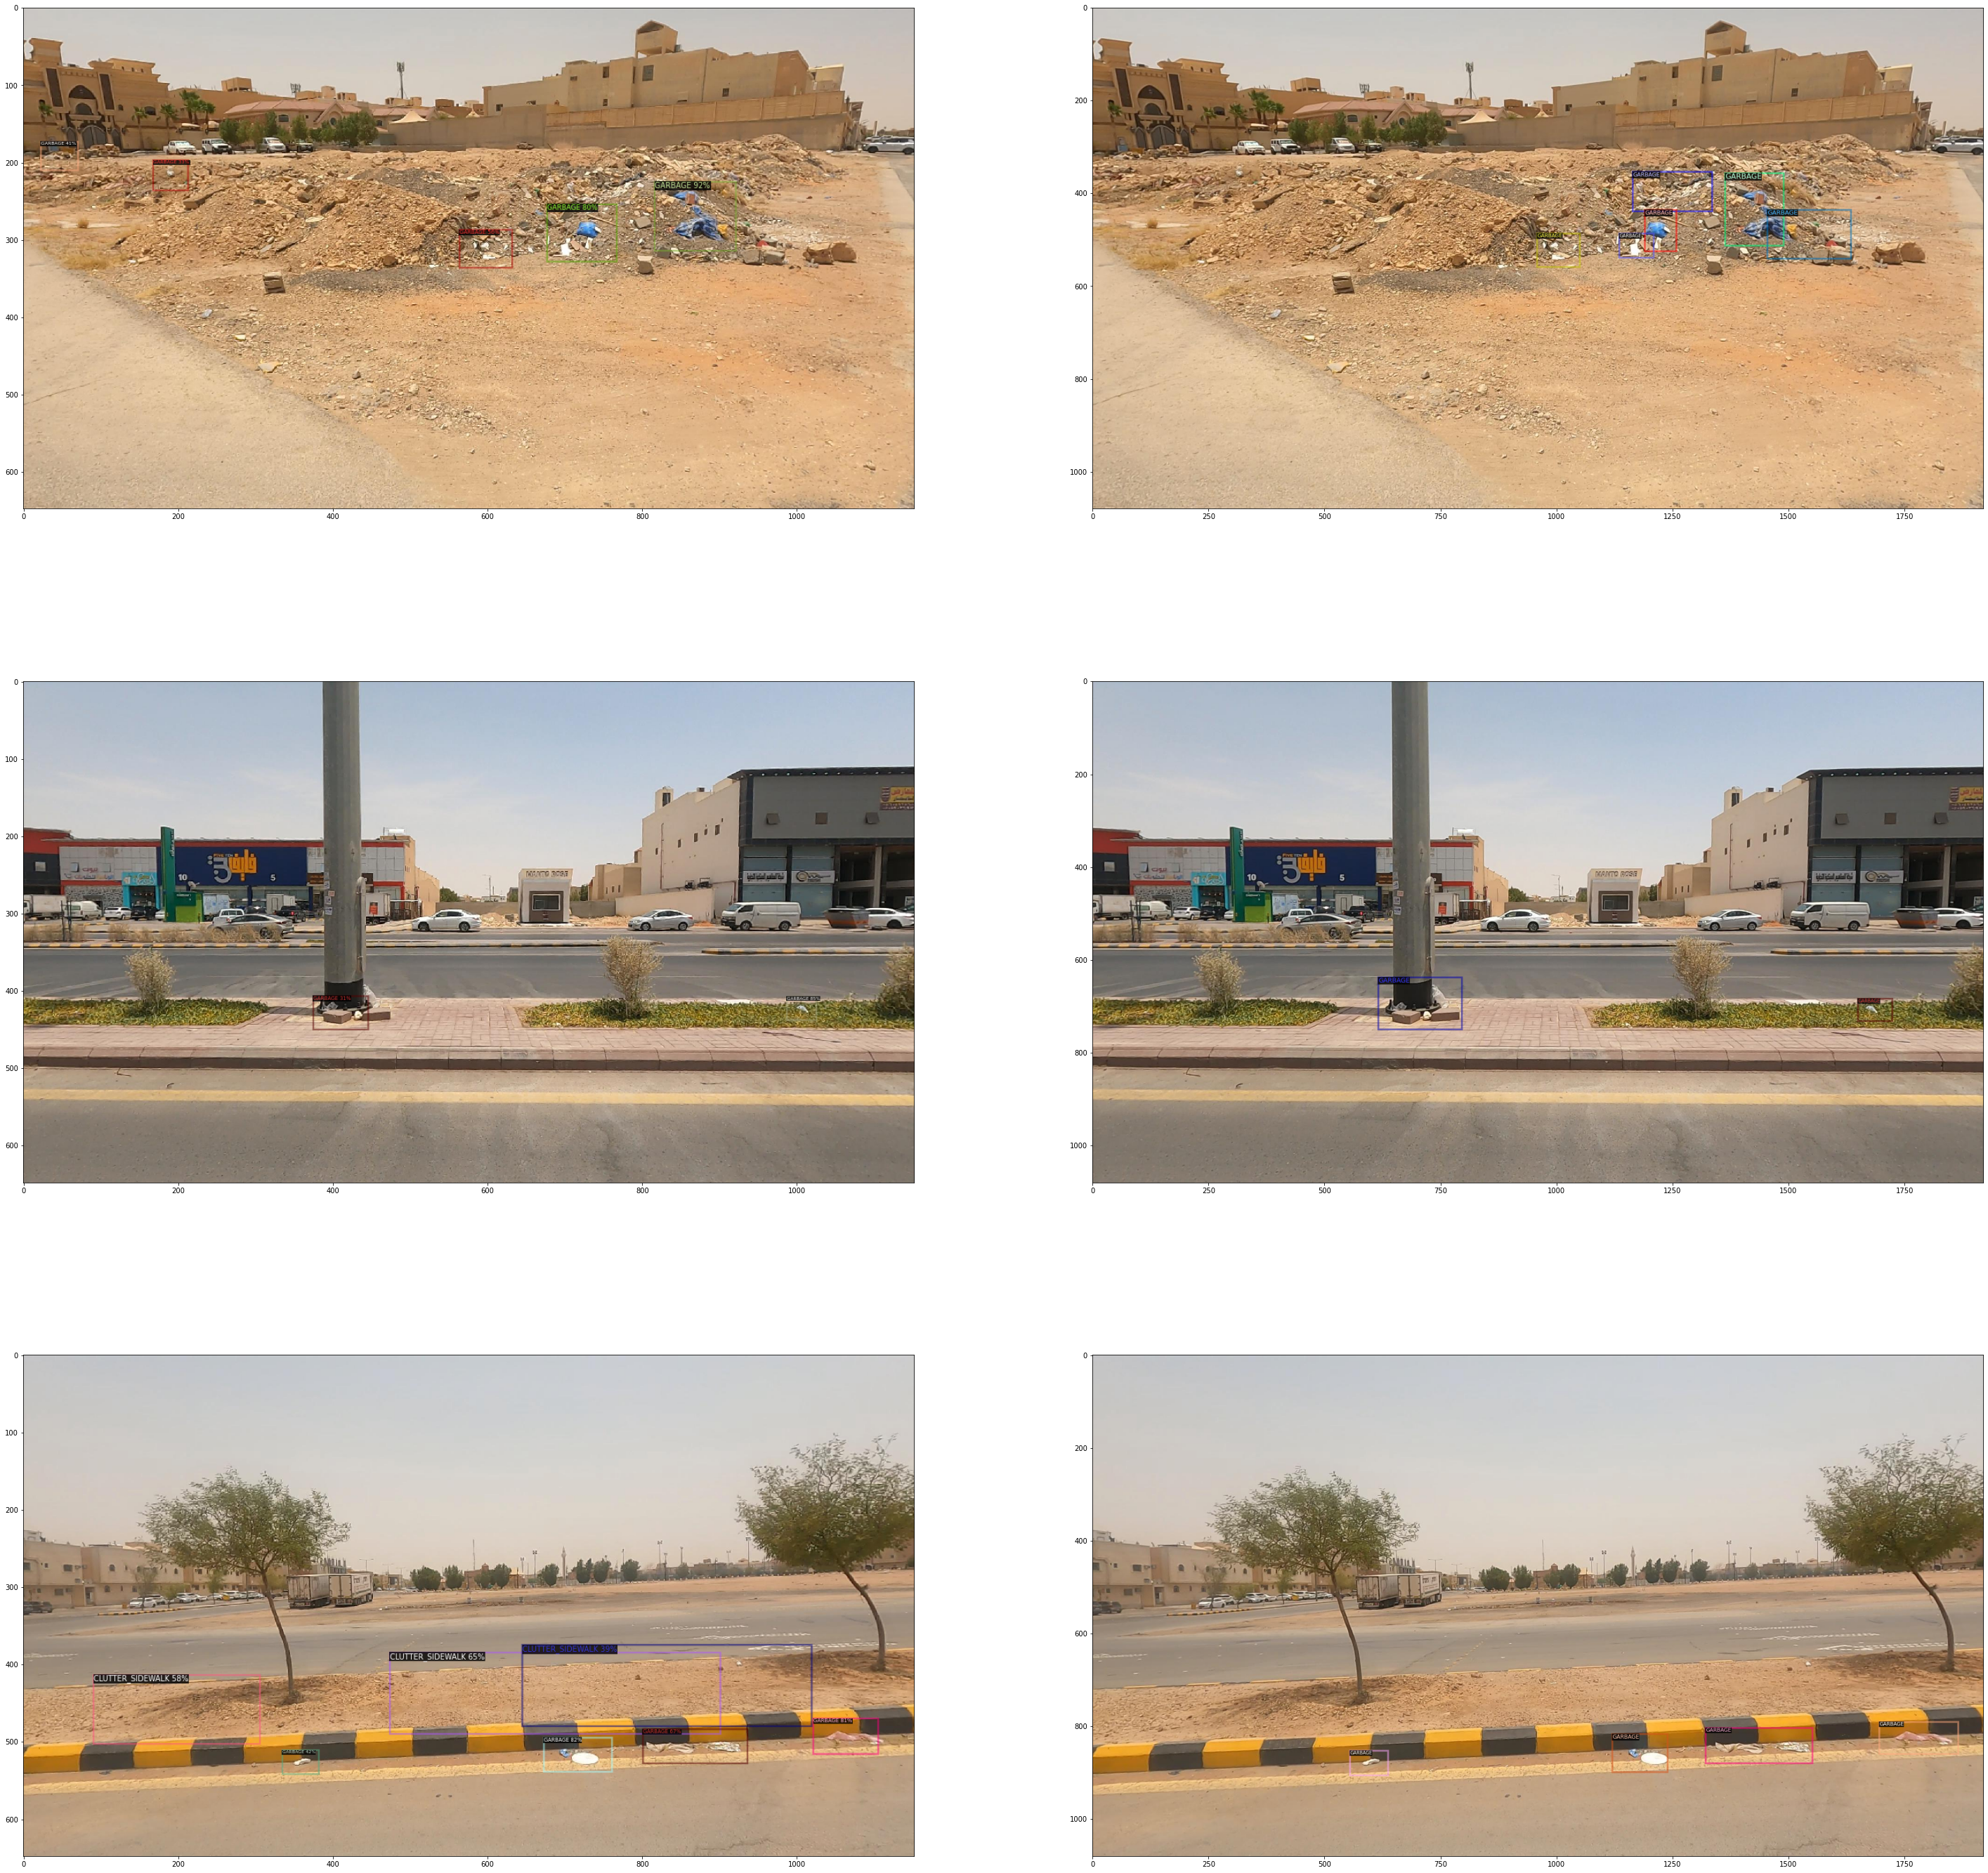

In [22]:
#Test Random Images from validation
import detectron2
from pathlib import Path
import random, cv2, os
import matplotlib.pyplot as plt
import numpy as np
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.utils.visualizer import ColorMode

#Use the final weights generated after successful training for inference  
cfg.MODEL.WEIGHTS = "/content/phase1_detectron_model2.pth"
outs = []

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  # set the testing threshold for this model
#Pass the validation dataset
cfg.DATASETS.TEST = ("smartathon_val2", )

predictor = DefaultPredictor(cfg)

dataset_dicts = DatasetCatalog.get('smartathon_val2')

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get('smartathon_train2'), 
                   scale=0.6,
                   instance_mode=ColorMode.IMAGE   
    )
    v2 = v.draw_instance_predictions(outputs["instances"].to("cpu")) #Passing the predictions to CPU from the GPU
    visualizer = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get('smartathon_train2'))
    out_target = visualizer.draw_dataset_dict(d)
    outs.append(v2)
    outs.append(out_target)
_,axs = plt.subplots(len(outs)//2,2,figsize=(50,50))
for ax, out in zip(axs.reshape(-1), outs):
    ax.imshow(out.get_image())

In [23]:
import gdown
url='https://docs.google.com/uc?export=download&id=1_lvjNOUjM_rQYHNpzcuO_QsbTqELWbMs&confirm=t'
output='dataset.zip'
gdown.download(url, output, quiet=False) #, use_cookies=True)

Downloading...
From: https://docs.google.com/uc?export=download&id=1_lvjNOUjM_rQYHNpzcuO_QsbTqELWbMs&confirm=t
To: /content/dataset.zip
100%|██████████| 2.34G/2.34G [00:08<00:00, 264MB/s]


'dataset.zip'

In [ ]:
import os
os.chdir('/content/')
!unzip -u dataset.zip -d dataset/

In [25]:
import pandas as pd
test_df = pd.read_csv("/content/dataset/dataset/test.csv")
test_df

image_path
0     953ab1447c46ecfef67ab14629cd70c7.jpg
1     e4ddbaa7970fca225a51288ce5f7d3f9.jpg
2     5b8120d69607a077b7583334be3ba18b.jpg
3     138b1dc82005b4c33e4886260649d313.jpg
4     0f91ec1533b845b13089f8cf4e0a36f7.jpg
...                                    ...
2087  3e7dd159466f14474a0173e9b02f512a.jpg
2088  a464d4600589ddf541bed59942c0228d.jpg
2089  0a490958aac3c79bb815a0f1f6825284.jpg
2090  15afe8bce6c71deed2d53f56b78b90a8.jpg
2091  984841724143c66506986b3faa50e4b9.jpg

[2092 rows x 1 columns]

In [28]:
from detectron2.utils.visualizer import ColorMode
from tqdm import tqdm

smart_dict={'GRAFFITI' : 0.0 , 'FADED_SIGNAGE': 1.0 , 'POTHOLES': 2.0,
            'GARBAGE' : 3.0 , 'CONSTRUCTION_ROAD': 4.0 , 'BROKEN_SIGNAGE': 5.0,
            'BAD_STREETLIGHT' : 6.0 , 'BAD_BILLBOARD': 7.0 , 'SAND_ON_ROAD':8.0,
            'CLUTTER_SIDEWALK' : 9.0 , 'UNKEPT_FACADE': 10.0}


#Use the final weights generated after successful training for inference  
cfg.MODEL.WEIGHTS ="/content/phase1_detectron_model2.pth"

outs = []

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.39 # set the testing threshold for this model
#Pass the validation dataset
cfg.DATASETS.TEST = ("smartathon_val", )

predictor = DefaultPredictor(cfg)

dataset_dicts = DatasetCatalog.get('smartathon_val2')

class_names = MetadataCatalog.get("smartathon_train2").thing_classes
sub_df = pd.DataFrame(columns=['class','image_path','name','xmax','xmin','ymax','ymin'])
for index, row in tqdm(test_df.iterrows()):  
  t_path = '/content/dataset/dataset/images/'+row["image_path"]
  im = cv2.imread(t_path)
  outputs = predictor(im)
   

  pred_boxes = outputs['instances'].pred_boxes.tensor
  pred_scores = outputs['instances'].scores
  pred_classes = outputs['instances'].pred_classes
  pred_boxes = pred_boxes.cpu().numpy()
  pred_scores = pred_scores.cpu().numpy()
  pred_classes = pred_classes.cpu().numpy()
  
  if len(pred_boxes)>0:
   
    passit = False
    for idx in range(len(pred_boxes)):
      xmin, ymin, xmax, ymax = pred_boxes[idx]
      name = class_names[pred_classes[idx]]
      

      if name == "None":
         continue
         
      pclass = smart_dict[name]
      image_path = row["image_path"]

      if (name == "POTHOLES") and pred_scores[idx] >= 0.2:
        xcenter = xmin+abs((xmax-xmin)/2)
        ycenter = ymin+abs((ymax-ymin)/2)
        xlength = abs((xmax - xcenter))
        ylength = abs((ymax - ycenter))
        xmin = xcenter - 2*xlength 
        ymin = ycenter - 2*ylength 
        xmax = xcenter + 2*xlength
        ymax = ycenter + 2*ylength 
        xmin = xmin/2
        ymin = ymin/2
        xmax = xmax/2
        ymax = ymax/2
        passit = True
        
        
        sub_df = sub_df.append({'class':pclass, 'image_path':image_path, 'name':name, 'xmax':xmax, 'xmin':xmin, 'ymax':ymax, 'ymin':ymin}, ignore_index=True)

      elif pred_scores[idx] >= 0.4 or len(pred_boxes) == 1:
        xcenter = xmin+abs((xmax-xmin)/2)
        ycenter = ymin+abs((ymax-ymin)/2)
        xlength = abs((xmax - xcenter))
        ylength = abs((ymax - ycenter))
        xmin = xcenter - 2*xlength # - 10
        ymin = ycenter - 2*ylength #- 10
        xmax = xcenter + 2*xlength #- 10
        ymax = ycenter + 2*ylength #- 10
        xmin = xmin/2
        ymin = ymin/2
        xmax = xmax/2
        ymax = ymax/2
        passit = True
        sub_df = sub_df.append({'class':pclass, 'image_path':image_path, 'name':name, 'xmax':xmax, 'xmin':xmin, 'ymax':ymax, 'ymin':ymin}, ignore_index=True)

      else:
        continue

    if passit == False:
      sub_df = sub_df.append({'class':3.0, 'image_path':row["image_path"], 'name':"GARBAGE", 'xmax':1260, 'xmin':660, 'ymax':660, 'ymin':420}, ignore_index=True)
 
  else:

    sub_df = sub_df.append({'class':3.0, 'image_path':row["image_path"], 'name':"GARBAGE", 'xmax':1260, 'xmin':660, 'ymax':660, 'ymin':420}, ignore_index=True)


[01/21 10:17:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/phase1_detectron_model2.pth ...
WARNING [01/21 10:17:59 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/21 10:17:59 d2.data.datasets.coco]: Loaded 788 images in COCO format from /content/valid.json


2092it [12:28,  2.79it/s]


In [29]:
sub_df

class                            image_path              name  \
0       7.0  953ab1447c46ecfef67ab14629cd70c7.jpg     BAD_BILLBOARD   
1       3.0  e4ddbaa7970fca225a51288ce5f7d3f9.jpg           GARBAGE   
2       2.0  5b8120d69607a077b7583334be3ba18b.jpg          POTHOLES   
3       2.0  5b8120d69607a077b7583334be3ba18b.jpg          POTHOLES   
4       2.0  5b8120d69607a077b7583334be3ba18b.jpg          POTHOLES   
...     ...                                   ...               ...   
5576    3.0  15afe8bce6c71deed2d53f56b78b90a8.jpg           GARBAGE   
5577    2.0  15afe8bce6c71deed2d53f56b78b90a8.jpg          POTHOLES   
5578    3.0  15afe8bce6c71deed2d53f56b78b90a8.jpg           GARBAGE   
5579    9.0  984841724143c66506986b3faa50e4b9.jpg  CLUTTER_SIDEWALK   
5580    9.0  984841724143c66506986b3faa50e4b9.jpg  CLUTTER_SIDEWALK   

            xmax        xmin        ymax        ymin  
0     706.462036  610.588745  225.310020  168.089287  
1     639.786713  490.968231  419.145355  322.178802  
2     399.833069  205.043518  520.546036  351.196976  
3     561.282822  490.154709  253.466660  195.434677  
4     753.859406  548.094879  530.558685  346.750702  
...          ...         ...         ...         ...  
5576  818.897095  769.021851  330.899277  289.461349  
5577  703.571838  516.120178  504.094650  353.291367  
5578  676.223969  598.567596  438.099030  374.612091  
5579  702.639069  -39.388641  336.626122  200.800468  
5580  965.735168  549.212463  316.406761  203.983574  

[5581 rows x 7 columns]

In [30]:
sub_df.to_csv("/content/sub_phase2.csv",index=False)